In [2]:
import pandas as pd
from sklearn import tree

In [3]:
dataset=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')

In [4]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Deleted the columns not so important 

In [5]:
dataset1=dataset.drop(['ID', 'ZIP Code'], axis = 1) 

In [6]:
dataset1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### mapped the important columns to be worked on to a varaibale

In [7]:
predictor=pd.DataFrame([dataset1['Experience'], dataset1['Age'], dataset1['Income'],dataset1['Family'], dataset1['CCAvg'], dataset1['Education'],dataset1['Mortgage'], dataset1['Securities Account'], dataset1['CD Account'],dataset1['Online'], dataset1['CreditCard']]).T

In [8]:
from sklearn.ensemble import RandomForestClassifier

#### Selected the most useful columns for classification model building using random forests

In [9]:
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [10]:
features=['Experience','Age','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']

In [11]:
rf_model.fit(X=predictor,y=dataset1['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
print('The oob score is\n',rf_model.oob_score_)

The oob score is
 0.9882


In [13]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Experience 0.04450383781219471
Age 0.04511845557037099
Income 0.34599915446249147
Family 0.09458255888852574
CCAvg 0.18460585962564763
Education 0.16241765531886923
Mortgage 0.04358415397014237
Securities Account 0.005680573911033428
CD Account 0.0546258214411213
Online 0.008664439380645414
CreditCard 0.010217489618957791


In [40]:
#now select the import features and write them into a file and also change the values of predictor for oob score but as there is rarely any bad data, select all features

#### As all the features are important, all the columns are selected and model is fitted

In [14]:
rf_model.fit(X=predictor,y=dataset1['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
model=tree.DecisionTreeClassifier(max_depth=5)
model.fit(X=predictor,y=dataset1['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
with open("TreefileBankLoan.dot",'w')as f:
    f= tree.export_graphviz(model, feature_names=['Experience','Age','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'],out_file=f);

In [17]:
model.score(X=predictor,y=dataset1['Personal Loan'])

0.9898

In [19]:
from graphviz import Source
path = '/home/ashish/Documents/LetsUpgrade/Day 21/dataset/TreefileBankLoan.dot'
s = Source.from_file(path)
s.view()

'/home/ashish/Documents/LetsUpgrade/Day 21/dataset/TreefileBankLoan.dot.pdf'

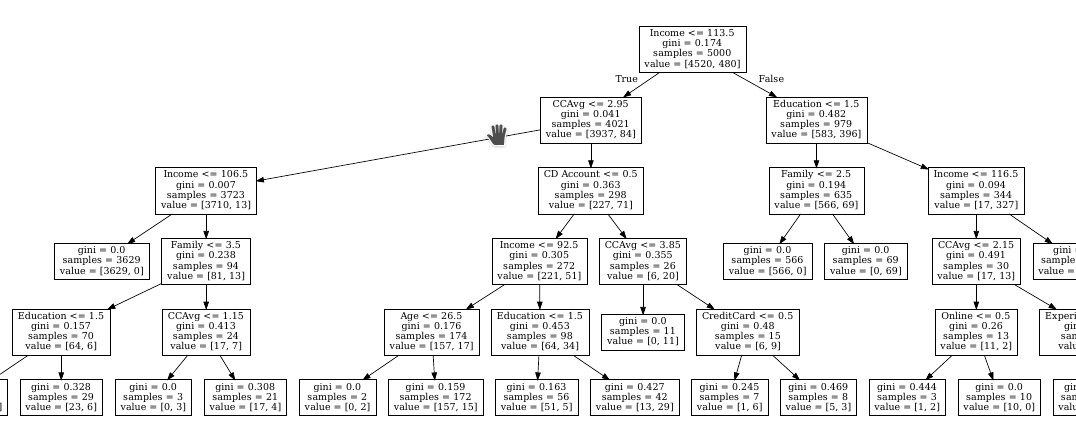

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
n_features=predictor.shape[1]
plt.barh(range(n_features), rf_model.feature_importances_,align='center')
plt.yticks(np.arange(n_features), predictor.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()